## Data Cleaning and Understanding

In [35]:
import pandas as pd

# Load data
tsla = pd.read_csv('../data/TSLA_cleaned.csv')




In [36]:
tsla.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02 00:00:00+00:00,14.858000,14.883333,14.217333,14.620667,71466000.0,14.620667
3,2015-01-05 00:00:00+00:00,14.303333,14.433333,13.810667,14.006000,80527500.0,14.006000
4,2015-01-06 00:00:00+00:00,14.004000,14.280000,13.614000,14.085333,93928500.0,14.085333


In [37]:
tsla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [38]:
# Check basic statistics
tsla.describe()


,Open,High,Low,Close,Volume,Adj Close
count,2474.000000,2474.000000,2474.000000,2474.000000,2.474000e+03,2474.000000
mean,111.461872,113.895836,108.869421,111.438965,1.125745e+08,111.438965
std,110.208156,112.643277,107.541830,110.120450,7.449619e+07,110.120450
min,9.488000,10.331333,9.403333,9.578000,1.062000e+07,9.578000
25%,17.058499,17.368167,16.790167,17.066167,6.682590e+07,17.066167
50%,24.986667,25.279000,24.462334,25.043000,9.289395e+07,25.043000
75%,217.264999,221.910004,212.084999,216.865002,1.301899e+08,216.865002
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,409.970001


In [39]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2474 non-null   object 
 1   Open       2474 non-null   float64
 2   High       2474 non-null   float64
 3   Low        2474 non-null   float64
 4   Close      2474 non-null   float64
 5   Volume     2474 non-null   float64
 6   Adj Close  2474 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.5+ KB


Date         2
Open         2
High         2
Low          2
Close        2
Volume       2
Adj Close    2
dtype: int64


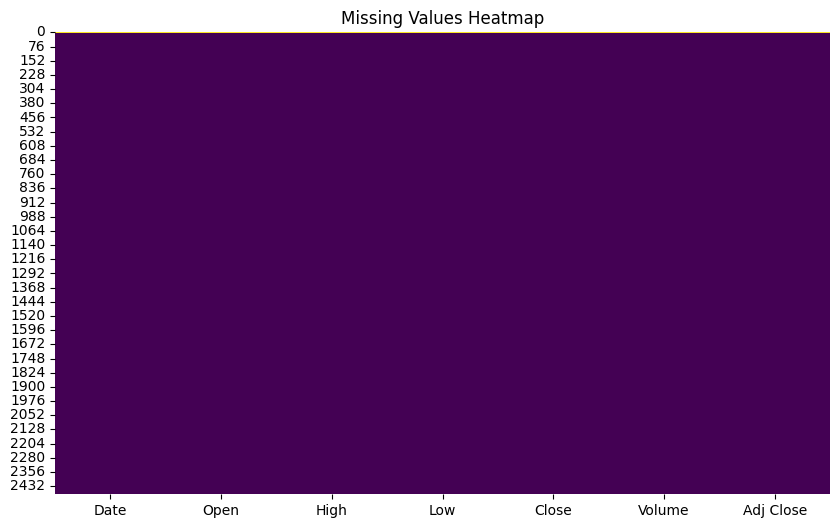

In [40]:
# Check for missing values
print(tsla.isnull().sum())

# Optionally, visualize missing values using a heatmap (requires seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(tsla.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [46]:
# Fill missing values using forward fill or interpolate method
tsla = tsla.dropna()  # or tsla.interpolate()

# Verify there are no missing values left
print(tsla.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [47]:
# Check the data types of each column
print(tsla.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


In [48]:
# Convert columns to numeric data type and coerce errors to NaN
columns_to_convert = [ 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
for column in columns_to_convert:
    tsla[column] = pd.to_numeric(tsla[column], errors='coerce')

# Verify the conversion
print(tsla.dtypes)


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_11044\2025268778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla[column] = pd.to_numeric(tsla[column], errors='coerce')


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
tsla[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(tsla[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Display scaled data
tsla.head()


C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_11044\3858635705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(tsla[['Open', 'High', 'Low', 'Close', 'Adj Close']])


,Date,Open,High,Low,Close,Volume,Adj Close
2,2015-01-02 00:00:00+00:00,0.013359,0.011263,0.012148,0.012594,71466000.0,0.012594
3,2015-01-05 00:00:00+00:00,0.011979,0.010149,0.011122,0.011059,80527500.0,0.011059
4,2015-01-06 00:00:00+00:00,0.011234,0.009770,0.010626,0.011257,93928500.0,0.011257
5,2015-01-07 00:00:00+00:00,0.011780,0.009866,0.011563,0.011202,44526000.0,0.011202
6,2015-01-08 00:00:00+00:00,0.011690,0.009704,0.011602,0.011147,51637500.0,0.011147


## EDA

### Visualize the Closing Price Over Time

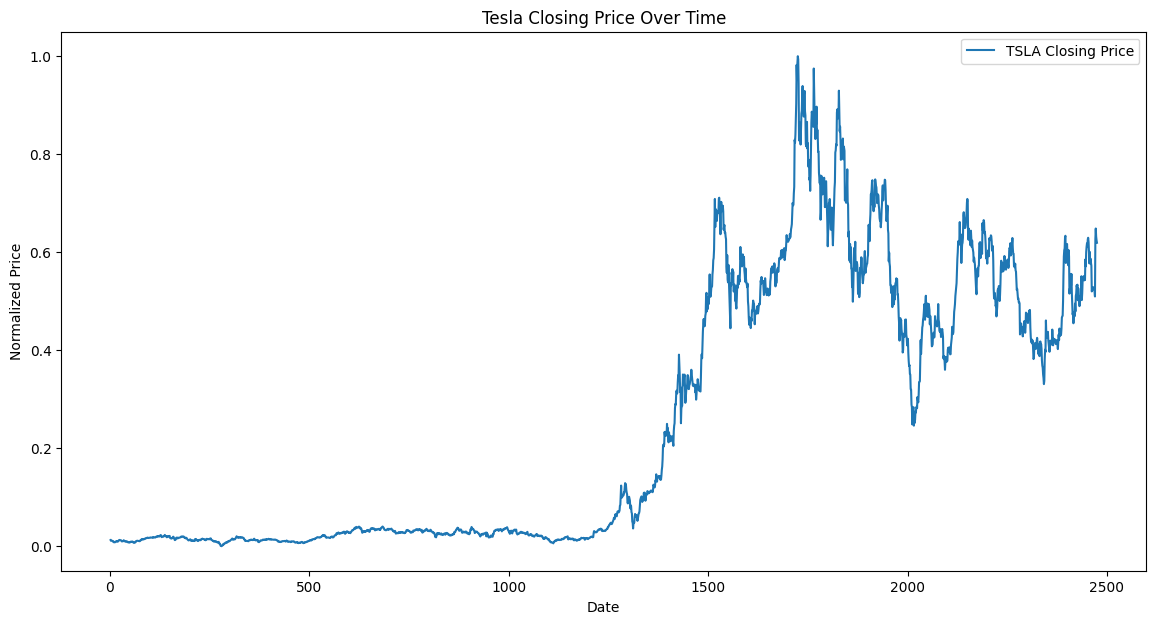

In [51]:
plt.figure(figsize=(14, 7))
plt.plot(tsla['Close'], label='TSLA Closing Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


### Calculate and Plot the Daily Percentage Change

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_11044\1529925118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['Daily Return'] = tsla['Adj Close'].pct_change()


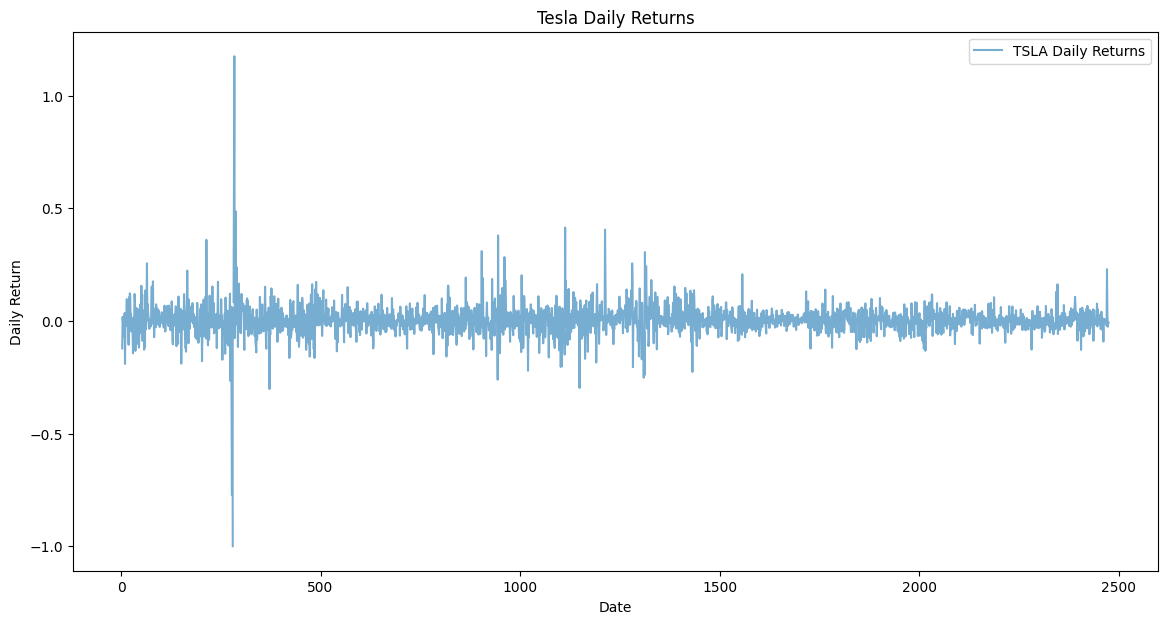

In [52]:
tsla['Daily Return'] = tsla['Adj Close'].pct_change()

# Plot daily percentage change
plt.figure(figsize=(14, 7))
plt.plot(tsla['Daily Return'], label='TSLA Daily Returns', alpha=0.6)
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


### Analyze Volatility with Rolling Statistics

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_11044\3743550213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['Rolling Mean'] = tsla['Adj Close'].rolling(window=30).mean()
C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_11044\3743550213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['Rolling Std'] = tsla['Adj Close'].rolling(window=30).std()


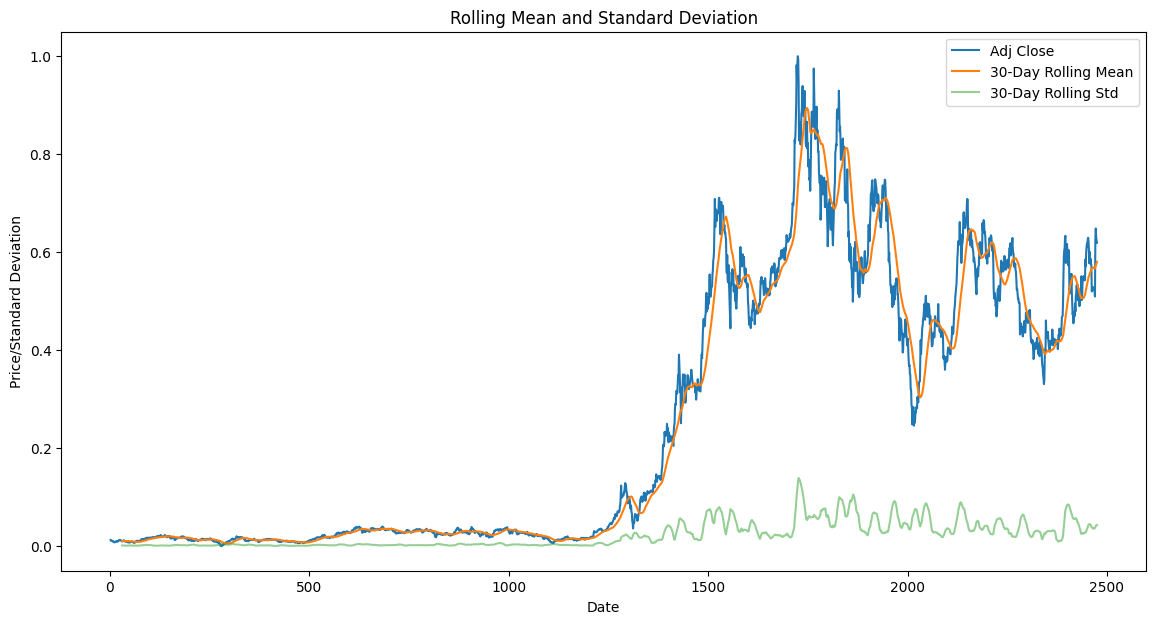

In [53]:
tsla['Rolling Mean'] = tsla['Adj Close'].rolling(window=30).mean()
tsla['Rolling Std'] = tsla['Adj Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(tsla['Adj Close'], label='Adj Close')
plt.plot(tsla['Rolling Mean'], label='30-Day Rolling Mean')
plt.plot(tsla['Rolling Std'], label='30-Day Rolling Std', alpha=0.5)
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price/Standard Deviation')
plt.legend()
plt.show()


### Outlier Detection

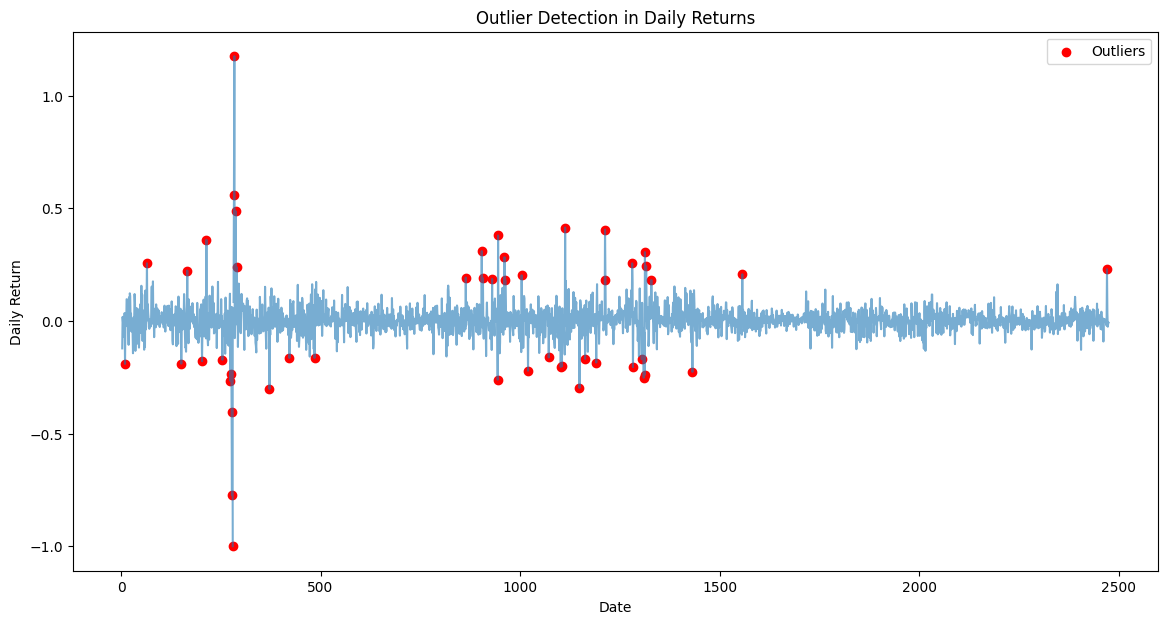

In [54]:
outliers = tsla[(tsla['Daily Return'] > tsla['Daily Return'].quantile(0.99)) | 
                (tsla['Daily Return'] < tsla['Daily Return'].quantile(0.01))]

# Plot outliers
plt.figure(figsize=(14, 7))
plt.scatter(outliers.index, outliers['Daily Return'], color='red', label='Outliers')
plt.plot(tsla['Daily Return'], alpha=0.6)
plt.title('Outlier Detection in Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


### Seasonality and Trend Analysis

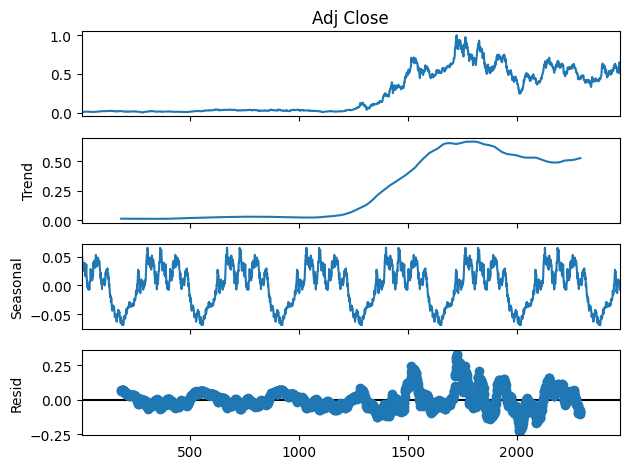

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Use the additive model for decomposition
result = seasonal_decompose(tsla['Adj Close'], model='additive', period=365)
result.plot()
plt.show()


In [56]:
import numpy as np

# Calculate VaR at 95% confidence interval
VaR_95 = np.percentile(tsla['Daily Return'].dropna(), 5)
print(f"Value at Risk (95% Confidence Level): {VaR_95:.2%}")


Value at Risk (95% Confidence Level): -8.58%


In [57]:
# Annualize daily return and standard deviation
mean_daily_return = tsla['Daily Return'].mean()
std_daily_return = tsla['Daily Return'].std()
sharpe_ratio = (mean_daily_return / std_daily_return) * np.sqrt(252)
print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")


Annualized Sharpe Ratio: nan


c:\Users\zelalem.wubet\projects\personal\ten-academy\Portfolio-Optimization-TimeSeries\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
